## gradient descent algorithm

In [10]:
import numpy as np

$$
loss = \sum\limits_{i = 1}^n {{{(w \cdot {x_i} + b - {y_i})}^2}}
$$

In [11]:
# compute loss()
def compute_error_for_line_given_points(b, w, points):
    totalError = 0
    N = len(points)
    for i in range(N):
        x = points[i, 0]
        y = points[i, 1]
        totalError += ((w * x + b) - y) ** 2
    # average loss for each point
    return totalError / float(N)

$$
\frac{{\partial l}}{{\partial w}} = \sum\limits_{i = 1}^n {2(w \cdot {x_i} + b - {y_i}) \cdot {x_i}} \\

\frac{{\partial l}}{{\partial b}} = \sum\limits_{i = 1}^n {2(w \cdot {x_i} + b - {y_i})} \\
$$

In [12]:
# return steped [b, w]
def step_gradient(b_current, w_current, points, learning_rate):
    b_gradient = 0
    w_gradient = 0
    N = len(points)
    for i in range(N):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += (2/float(N)) * ((w_current * x + b_current) - y)
        w_gradient += (2/float(N)) * x * ((w_current * x + b_current) - y)
    
    # update w, b
    new_b = b_current - (learning_rate * b_gradient)
    new_w = w_current - (learning_rate * w_gradient)
    return [new_b, new_w]

In [13]:
# minimize loss
def gradient_descent_runner(points, starting_b, starting_w, learing_rate, num_iterations):
    b = starting_b
    w = starting_w
    # update for several times
    for i in range(num_iterations):
        b, w = step_gradient(b, w, points, learing_rate)
    return [b, w]

In [14]:
def run():
    points = np.genfromtxt("01data.csv", delimiter = ",")
    # print(points[0])
    learning_rate = 0.0001
    initial_b = 0
    initial_w = 0
    num_iterations = 1000
    print("Starting gradient descent at b = {}, w = {}, loss = {}".format(initial_b, initial_w, compute_error_for_line_given_points(initial_b, initial_w, points)))
    print("Running")
    b, w = gradient_descent_runner(points, initial_b, initial_w, learning_rate, num_iterations)
    print("After {} iterations b = {}, w = {}, loss = {}".format(num_iterations, b, w, compute_error_for_line_given_points(b, w, points)))
    return [b, w]

In [15]:
[b, w] = run()

Starting gradient descent at b = 0, w = 0, loss = 5565.107834483211
Running
After 1000 iterations b = 0.08893651993741346, w = 1.4777440851894448, loss = 112.61481011613473


## visualize by matplotlib

In [16]:
import matplotlib.pyplot as plt

In [17]:
def visualization(b, w):
    points = np.genfromtxt("01data.csv", delimiter=',')
    x_points = points[:, 0]
    y_points = points[:, 1]

    plt.scatter(x_points, y_points)
    p0 = [20, 80]
    p1 = [w * 20 + b, w * 80 + b]
    plt.plot(p0, p1, "r")
    plt.show()

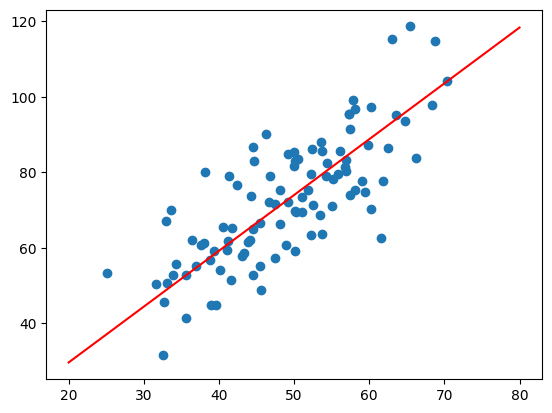

In [18]:
visualization(b, w)